In [20]:
import pandas as pd
import numpy as np
import json

file_names = []

for i in range(1,11):
    file_names.append(f"htimes{i}.csv")
file_names

['htimes1.csv',
 'htimes2.csv',
 'htimes3.csv',
 'htimes4.csv',
 'htimes5.csv',
 'htimes6.csv',
 'htimes7.csv',
 'htimes8.csv',
 'htimes9.csv',
 'htimes10.csv']

In [21]:
dfs=[]
for file_name in file_names:
    df = pd.read_csv(file_name, encoding='utf-16-le', sep=';')
    dfs.append(df)

In [22]:
df = pd.concat(dfs, ignore_index=True)
df["solvable"]=df["solvable"].astype(bool)
df["hasMultipleResults"] = df["hasMultipleResults"].astype(bool)
df["easilySolvable"] = df["easilySolvable"].astype(bool)
df

C:\Users\roman\AppData\Local\Temp\ipykernel_32940\622431671.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(dfs, ignore_index=True)


,elapsedMs,solvable,hasMultipleResults,easilySolvable,cells,cellsSolved,cellsHuman
0,20.3701,True,True,False,"[-1,-1,-1,-1,5,-1,7,-1,9,5,7,8,-1,-1,-1,-1,6,4...","[1,3,4,2,5,6,7,8,9,5,7,8,1,3,9,2,6,4,2,9,6,4,8...","[-1,-1,-1,-1,5,-1,7,8,9,5,7,8,-1,-1,-1,2,6,4,-..."
1,14136.1706,True,True,False,"[-1,-1,6,-1,-1,-1,4,-1,5,2,-1,-1,3,-1,5,7,8,-1...","[1,3,6,2,7,8,4,9,5,2,4,9,3,6,5,7,8,1,5,7,8,9,4...","[-1,-1,6,-1,-1,8,4,-1,5,2,4,-1,3,6,5,7,8,-1,-1..."
2,176.5586,True,True,False,"[3,4,6,-1,-1,-1,-1,-1,8,5,-1,-1,-1,3,-1,4,-1,7...","[3,4,6,2,7,9,5,1,8,5,2,9,1,3,8,4,6,7,1,8,7,4,5...","[3,4,6,-1,-1,-1,5,1,8,5,2,9,-1,3,-1,4,6,7,1,8,..."
3,9.0839,True,True,False,"[7,-1,-1,-1,5,-1,-1,-1,9,3,1,-1,4,-1,-1,-1,-1,...","[7,6,4,2,5,1,3,8,9,3,1,5,4,8,9,7,6,2,8,2,9,3,6...","[7,-1,4,-1,5,-1,-1,-1,9,3,1,-1,4,-1,-1,-1,-1,2..."
4,3.2588,True,True,False,"[7,2,-1,-1,-1,-1,6,-1,-1,-1,6,5,-1,-1,8,-1,1,-...","[7,2,1,3,4,5,6,9,8,3,6,5,2,9,8,4,1,7,4,8,9,7,1...","[7,2,-1,-1,-1,-1,6,-1,8,3,6,5,-1,-1,8,-1,1,-1,..."
...,...,...,...,...,...,...,...
165,34.4056,True,True,False,"[2,-1,4,-1,9,-1,-1,-1,8,-1,5,-1,-1,-1,8,-1,-1,...","[2,3,4,1,9,5,6,7,8,1,5,7,2,6,8,3,4,9,9,6,8,4,3...","[2,3,4,-1,9,-1,-1,-1,8,-1,5,-1,-1,-1,8,3,-1,-1..."
166,357.1233,True,True,False,"[8,-1,-1,-1,-1,-1,-1,-1,5,-1,-1,-1,-1,9,-1,-1,...","[8,1,2,4,6,3,7,9,5,3,5,7,1,9,2,4,8,6,4,9,6,5,8...","[8,-1,-1,-1,-1,-1,-1,-1,5,-1,-1,-1,-1,9,-1,-1,..."
167,4.9086,True,True,False,"[-1,-1,3,-1,-1,7,-1,-1,-1,-1,-1,-1,-1,4,-1,-1,...","[6,1,3,2,5,7,8,4,9,5,2,8,3,4,9,7,6,1,4,9,7,1,8...","[6,-1,3,-1,-1,7,-1,-1,-1,-1,-1,-1,-1,4,-1,-1,6..."
168,54.2247,True,True,False,"[-1,-1,-1,2,-1,9,5,-1,-1,-1,-1,-1,-1,5,-1,3,-1...","[1,3,4,2,8,9,5,7,6,2,7,9,4,5,6,3,1,8,5,8,6,1,3...","[-1,-1,-1,2,-1,9,5,-1,6,-1,-1,-1,-1,5,6,3,-1,8..."


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   elapsedMs           170 non-null    float64
 1   solvable            170 non-null    bool   
 2   hasMultipleResults  170 non-null    bool   
 3   easilySolvable      170 non-null    bool   
 4   cells               170 non-null    object 
 5   cellsSolved         170 non-null    object 
 6   cellsHuman          170 non-null    object 
dtypes: bool(3), float64(1), object(3)
memory usage: 5.9+ KB


In [24]:
df["elapsedMs"].describe()

count       170.000000
mean       7711.036245
std       25396.879048
min           0.207500
25%           9.167200
50%          46.309100
75%         847.185625
max      167997.311100
Name: elapsedMs, dtype: float64

<Axes: xlabel='solvable'>

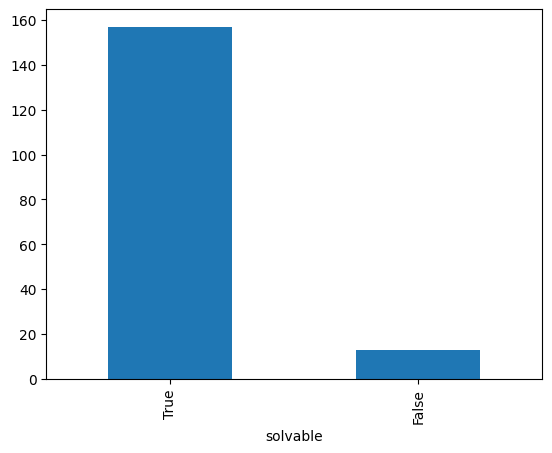

In [25]:
df["solvable"].value_counts().plot(kind="bar")

<Axes: xlabel='hasMultipleResults'>

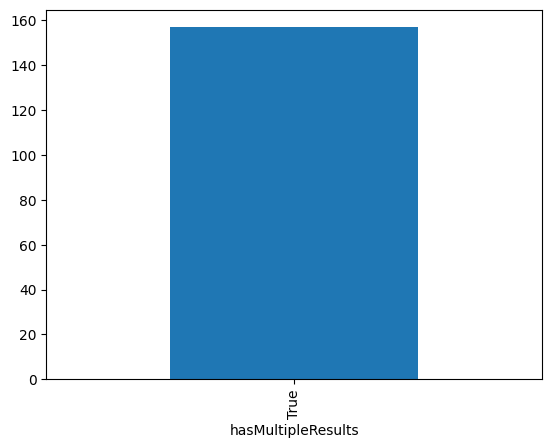

In [26]:
df[df['solvable']]["hasMultipleResults"].value_counts().plot(kind="bar")

<Axes: xlabel='easilySolvable'>

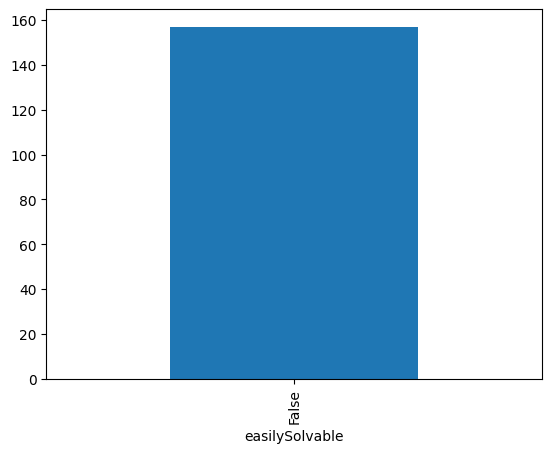

In [27]:
df[df['solvable']]["easilySolvable"].value_counts().plot(kind="bar")

In [28]:
np.matrix(df.loc[0]["cells"])

matrix([[-1, -1, -1, -1,  5, -1,  7, -1,  9,  5,  7,  8, -1, -1, -1, -1,
          6,  4, -1, -1, -1, -1,  8, -1,  3, -1,  1,  4,  5,  2,  8, -1,
         -1, -1, -1,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  8,  9,
         -1,  1, -1,  4, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1,  5,  3, -1, -1, -1, -1,  7, -1,  2, -1, -1, -1,  8, -1, -1,
         -1]])

In [29]:

np.matrix([json.loads(df.loc[0]["cells"])[i:i+9] for i in range(0, 81, 9)]), np.matrix([json.loads(df.loc[0]["cellsHuman"])[i:i+9] for i in range(0, 81, 9)]), np.matrix([json.loads(df.loc[0]["cellsSolved"])[i:i+9] for i in range(0, 81, 9)])

(matrix([[-1, -1, -1, -1,  5, -1,  7, -1,  9],
         [ 5,  7,  8, -1, -1, -1, -1,  6,  4],
         [-1, -1, -1, -1,  8, -1,  3, -1,  1],
         [ 4,  5,  2,  8, -1, -1, -1, -1,  6],
         [-1, -1, -1, -1, -1, -1, -1, -1, -1],
         [-1,  8,  9, -1,  1, -1,  4, -1,  2],
         [-1, -1, -1, -1, -1, -1, -1, -1, -1],
         [-1, -1,  5,  3, -1, -1, -1, -1,  7],
         [-1,  2, -1, -1, -1,  8, -1, -1, -1]]),
 matrix([[-1, -1, -1, -1,  5, -1,  7,  8,  9],
         [ 5,  7,  8, -1, -1, -1,  2,  6,  4],
         [-1, -1, -1, -1,  8, -1,  3,  5,  1],
         [ 4,  5,  2,  8, -1, -1, -1, -1,  6],
         [-1, -1, -1, -1, -1, -1, -1, -1, -1],
         [-1,  8,  9, -1,  1, -1,  4, -1,  2],
         [-1, -1, -1, -1, -1, -1, -1, -1, -1],
         [-1, -1,  5,  3, -1, -1, -1, -1,  7],
         [-1,  2, -1, -1, -1,  8, -1, -1, -1]]),
 matrix([[1, 3, 4, 2, 5, 6, 7, 8, 9],
         [5, 7, 8, 1, 3, 9, 2, 6, 4],
         [2, 9, 6, 4, 8, 7, 3, 5, 1],
         [4, 5, 2, 8, 7, 3, 1, 9, 6]